# Import All Necessary Library

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import skfuzzy as skf
from  sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import anfis
import joblib

# local import
import anfis
import membership.mfDerivs
import membership.membershipfunction

# Data Collection

In [3]:
# path to dataset
path = "dataset/raw/power_plant.csv"

In [4]:
# read data
df = pd.read_csv(path, sep=";")
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


# Data Preprocessing

dikarenakan range data sangat beragam dan berada pada angka yang sangat besar, maka akan menyulitkan fungsi *membership function* yang akan digunakan (seperti menghitung exp).

sehingga data perlu di praproses terlebih dahulu yakni: **Standarisasi**

In [5]:
# std scaler object
scaler = StandardScaler()
y_scaler = StandardScaler()

In [6]:
# fit scaler
scaler.fit(df)
y_scaler.fit(df["PE"].to_numpy().reshape(-1,1))

StandardScaler()

In [7]:
# transform the data
df_tr = scaler.transform(df)

In [8]:
# save transformed data
df_tr = pd.DataFrame(df_tr, columns=scaler.feature_names_in_)

# Data Exploration & MF Designs

in this step, I explore the statistical feature of the data to better understand the data and better design the membership function that would be fed into ANFIS network.

## Statistical Summary

In [9]:
df_tr.describe()

,AT,V,AP,RH,PE
count,9.568000e+03,9.568000e+03,9.568000e+03,9.568000e+03,9.568000e+03
mean,-1.845421e-16,-1.927110e-16,5.472211e-15,-3.375227e-16,-1.771901e-15
std,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00
min,-2.394126e+00,-2.277901e+00,-3.430019e+00,-3.270589e+00,-1.998406e+00
25%,-8.240958e-01,-9.888705e-01,-7.003615e-01,-6.836860e-01,-8.563765e-01
50%,9.309729e-02,-1.751604e-01,-5.373067e-02,1.141150e-01,-1.649474e-01
75%,8.143721e-01,9.627745e-01,6.737290e-01,7.891378e-01,8.241478e-01
max,2.342804e+00,2.144779e+00,3.374760e+00,1.839173e+00,2.425568e+00


## Ambient Temperature (AT)

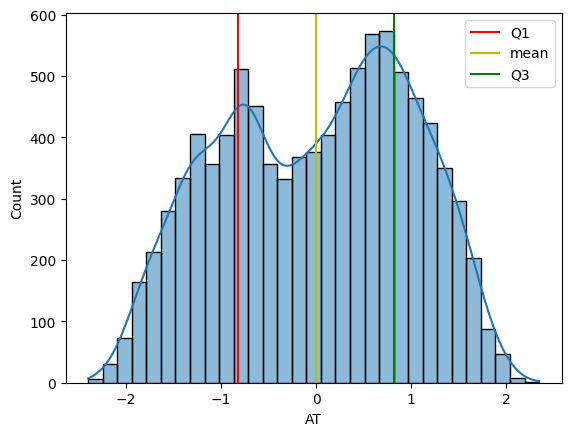

In [10]:
# data shape
sns.histplot(data=df_tr, x="AT", kde=True)
plt.axvline(df_tr["AT"].quantile(0.25), color="r", label="Q1")
plt.axvline(df_tr["AT"].mean(), color="y", label="mean")
plt.axvline(df_tr["AT"].quantile(0.75), color="g", label="Q3")
plt.legend()
plt.show()

In [11]:
print("Set Rendah")

# Q1
print("mean =", df_tr["AT"].quantile(0.25))

# std dev/2
print("sigma =", df_tr["AT"].std()/2)

Set Rendah
mean = -0.8240958335267508
sigma = 0.5000261308108569


In [12]:
print("Set Tinggi")

# Q3
print("mean =", df_tr["AT"].quantile(0.75))

# std dev/2
print("sigma =", df_tr["AT"].std()/2)

Set Tinggi
mean = 0.8143720600423695
sigma = 0.5000261308108569


akan digunakan dua set keanggotaan:
- rendah:
    * gauss(mean=-0.82, sigma=0.5)
- tinggi:
    * gauss(mean=0.81, sigma=0.5)

### MF of AT

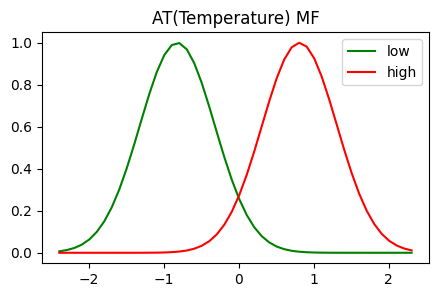

In [13]:
# data range
at_range = np.arange(df_tr["AT"].min(),df_tr["AT"].max(),0.1)

# mf
at_low = skf.gaussmf(at_range,-0.82,0.5)
at_high = skf.gaussmf(at_range,0.81,0.5)

# draw MF
plt.figure(figsize=(5,3))
plt.title("AT(Temperature) MF")
plt.plot(at_range,at_low, color="g", label="low")
plt.plot(at_range,at_high, color="r", label="high")
plt.legend()
plt.show()

## Exhaust Vacuum (V)

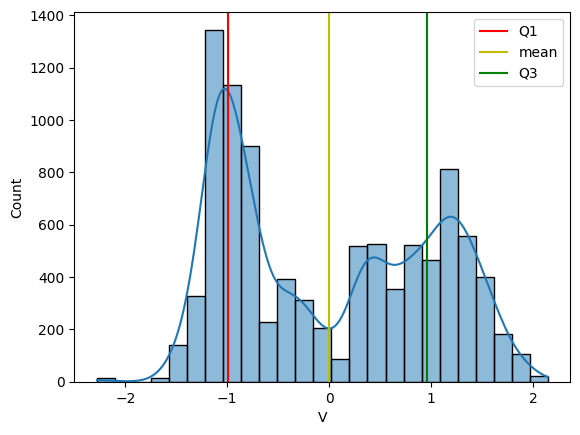

In [14]:
# data shape
sns.histplot(data=df_tr, x="V", kde=True)
plt.axvline(df_tr["V"].quantile(0.25), color="r", label="Q1")
plt.axvline(df_tr["V"].mean(), color="y", label="mean")
plt.axvline(df_tr["V"].quantile(0.75), color="g", label="Q3")
plt.legend()
plt.show()

In [15]:
print("Set Rendah")

# Q1
print("mean =", df_tr["V"].quantile(0.25))

# std dev/2
print("sigma =", df_tr["V"].std()/2)

print()

print("Set Tinggi")

# Q3
print("mean =", df_tr["V"].quantile(0.75))

# std dev/2
print("sigma =", df_tr["V"].std()/2)

Set Rendah
mean = -0.9888704942409366
sigma = 0.500026130810857

Set Tinggi
mean = 0.9627745260219804
sigma = 0.500026130810857


akan digunakan dua set keanggotaan:
- rendah:
    * gauss(mean=-0.99, sigma=0.5)
- tinggi:
    * gauss(mean=0.96, sigma=0.5)

### MF of V

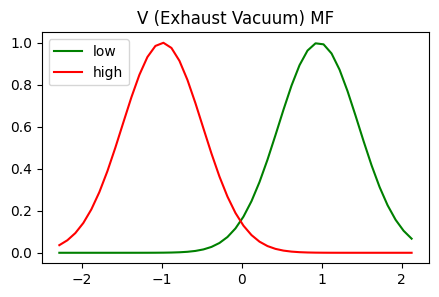

In [16]:
# data range
v_range = np.arange(df_tr["V"].min(),df_tr["V"].max(),0.1)

# mf
v_high = skf.gaussmf(v_range,-0.99,0.5)
v_low = skf.gaussmf(v_range,0.96,0.5)

# draw MF
plt.figure(figsize=(5,3))
plt.title("V (Exhaust Vacuum) MF")
plt.plot(v_range,v_low, color="g", label="low")
plt.plot(v_range,v_high, color="r", label="high")
plt.legend()
plt.show()

## Ambient Pressure (AP)

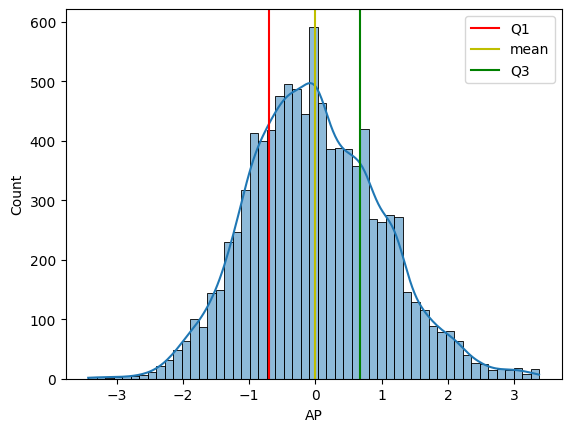

In [17]:
# data shape
sns.histplot(data=df_tr, x="AP", kde=True)
plt.axvline(df_tr["AP"].quantile(0.25), color="r", label="Q1")
plt.axvline(df_tr["AP"].mean(), color="y", label="mean")
plt.axvline(df_tr["AP"].quantile(0.75), color="g", label="Q3")
plt.legend()
plt.show()

In [18]:
print("Set Rendah")

# Q1
print("b =", df_tr["AP"].quantile(0.25))

# std deAP/2
print("c =", -(df_tr["AP"].std()/3))

print()

print("Set Sedang")

# mean
print("mean =", df_tr["AP"].mean())

# std deAP/3
print("sigma =", (df_tr["AP"].std()/2))

print()

print("Set Tinggi")

# Q3
print("b =", df_tr["AP"].quantile(0.75))

# std deAP/2
print("c =", df_tr["AP"].std()/3)

Set Rendah
b = -0.7003615123005106
c = -0.3333507538739046

Set Sedang
mean = 5.472211312847239e-15
sigma = 0.5000261308108569

Set Tinggi
b = 0.6737290185345286
c = 0.3333507538739046


akan digunakan tiga set keanggotaan:
- Rendah:
    * Sigmoid(b=-0.7, c=-10)
- Sedang:
    * Gauss(mean=0.005, sigma=0.5)
- Tinggi:
    * Sigmoid(b=0.67, c=10)

_note_ terdapat penyesuaian terhadap nilai c

### MF of AP

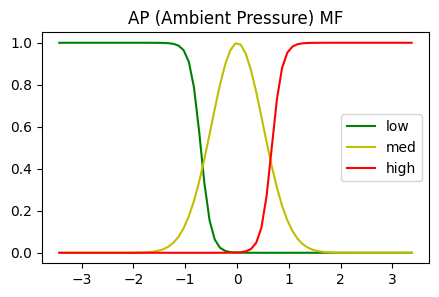

In [19]:
# data range
ap_range = np.arange(df_tr["AP"].min(),df_tr["AP"].max(),0.1)

# mf
ap_low = skf.sigmf(ap_range,b=-0.7,c=-10) # step down start at 75th percentile-3
ap_med = skf.gaussmf(ap_range,mean=0.005,sigma=0.5)
ap_high = skf.sigmf(ap_range,b=0.67,c=10) # step up start at 25th percentile-3

# draw MF
plt.figure(figsize=(5,3))
plt.title("AP (Ambient Pressure) MF")
plt.plot(ap_range,ap_low, color="g", label="low")
plt.plot(ap_range,ap_med, color="y", label="med")
plt.plot(ap_range,ap_high, color="r", label="high")
plt.legend()
plt.show()

## Relative Humidity (RH)

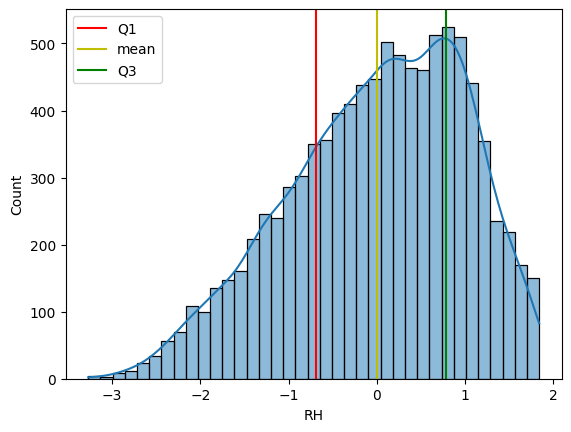

In [20]:
# data shape
sns.histplot(data=df_tr, x="RH", kde=True)
plt.axvline(df_tr["RH"].quantile(0.25), color="r", label="Q1")
plt.axvline(df_tr["RH"].mean(), color="y", label="mean")
plt.axvline(df_tr["RH"].quantile(0.75), color="g", label="Q3")
plt.legend()
plt.show()

In [21]:
print("Set Rendah")

# Q1
print("b =", df_tr["RH"].quantile(0.25))

# std dev/2
print("c =", -(df_tr["RH"].std()/3))

print()

print("Set Sedang")

# mean
print("mean =", df_tr["RH"].mean())

# std dev/3
print("sigma =", (df_tr["RH"].std()/2))

print()

print("Set Tinggi")

# Q3
print("b =", df_tr["RH"].quantile(0.75))

# std dev/2
print("c =", df_tr["RH"].std()/3)

Set Rendah
b = -0.6836860099871823
c = -0.33335075387390467

Set Sedang
mean = -3.3752265196798237e-16
sigma = 0.500026130810857

Set Tinggi
b = 0.7891378204378802
c = 0.33335075387390467


akan digunakan tiga set keanggotaan:
- Rendah:
    * Sigmoid(b=-0.68, c=-10)
- Sedang:
    * Gauss(mean=-0.003, sigma=0.5)
- Tinggi:
    * Sigmoid(b=0.79, c=10)

_note_
terdapat penyesuaian parameter c

### MF of RH

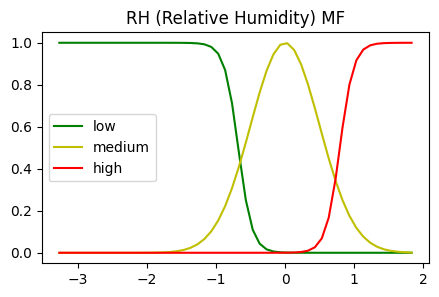

In [22]:
# data range
rh_range = np.arange(df_tr["RH"].min(),df_tr["RH"].max(),0.1)

# mf
rh_low = skf.sigmf(rh_range,-0.68,-10) # step down start at 75th percentile-3
rh_med = skf.gaussmf(rh_range, -0.003, 0.5)
rh_high = skf.sigmf(rh_range,0.79,10) # step up start at 25th percentile-3

# draw MF
plt.figure(figsize=(5,3))
plt.title("RH (Relative Humidity) MF")
plt.plot(rh_range,rh_low, color="g", label="low")
plt.plot(rh_range,rh_med, color="y", label="medium")
plt.plot(rh_range,rh_high, color="r", label="high")
plt.legend()
plt.show()

# Pemodelan

## MF Setting

In [23]:
# MF of AT
mf_AT = [['gaussmf',{'mean':-0.82,'sigma':0.5}], ['gaussmf',{'mean':0.81,'sigma':0.5}]]

# MF of V
mf_V = [['gaussmf',{'mean':-0.99,'sigma':0.5}], ['gaussmf',{'mean':0.96,'sigma':0.5}]]

# MF of AP
mf_AP = [['sigmf',{'b':-0.7,'c':-10}], ['gaussmf',{'mean':0.005,'sigma':0.5}], ['sigmf',{'b':0.67,'c':10}]]

# mf of RH
mf_RH = [['sigmf',{'b':-0.68,'c':-10}], ['gaussmf',{'mean':-0.003,'sigma':0.5}], ['sigmf',{'b':0.79,'c':10}]]


# all MF
mf = [mf_AT, mf_V, mf_AP, mf_RH]

In [24]:
# set the MF
mfc = membership.membershipfunction.MemFuncs(mf)

pada percobaan ini hanya digunakan 50 data training dan 30 data uji saja.

hal ini dikarenakan waktu komputasi yang sangat tinggi jika menggunakan banyak data

In [46]:
# set the Predictors and Target

X = df_tr.iloc[:50,:4]
y = df_tr.iloc[:50,4]

In [47]:
# create anfis object
anf = anfis.ANFIS(X, y, mfc)

# train anfis object
anf.trainHybridJangOffLine(epochs=20)

1
current error: 0.11214124460650547
2
current error: 0.11210444433403025
3
current error: 0.11206719243150311
4
current error: 0.11202949788468497
5
current error: 0.11198753158085124
6
current error: 0.11194077465164061
7
current error: 0.11188864204422336
8
current error: 0.11183047466905943
9
current error: 0.11176553111421679
10
current error: 0.11169297914478397
11
current error: 0.11161188733440082
12
current error: 0.11152121732541832
13
current error: 0.11141981740277351
14
current error: 0.11130641827556044
15
current error: 0.11117963215348162
16
current error: 0.1110379563574696
17
current error: 0.11087978272245409
18
current error: 0.11070341384329627
19
current error: 0.11050708666423127


array([[ 0.41197794],
       [-0.58425044],
       [ 2.0001689 ],
       [-0.44845116],
       [ 1.14211907],
       [-0.51484922],
       [ 0.70647283],
       [ 1.49591212],
       [ 1.2674309 ],
       [ 1.34788014],
       [-0.06894537],
       [-0.01707941],
       [-0.82580605],
       [-0.34075168],
       [-1.19317996],
       [ 0.45714323],
       [ 0.77070464],
       [ 1.25079417],
       [ 0.3193814 ],
       [ 0.58365401],
       [ 0.80265342],
       [ 2.36728009],
       [ 1.71898929],
       [-0.61804428],
       [-1.07237046],
       [-0.66962336],
       [ 0.61861917],
       [ 1.23989738],
       [ 1.76797321],
       [-0.98540827],
       [-0.57550869],
       [-0.84846725],
       [-0.7823458 ],
       [-1.01768371],
       [-0.57517393],
       [ 0.67625707],
       [-0.60281878],
       [-0.20902043],
       [ 0.8360801 ],
       [-0.32433863],
       [-0.42390511],
       [ 0.97693788],
       [ 1.58482962],
       [ 1.29845749],
       [ 1.20599413],
       [-0

In [57]:
# save model
joblib.dump(anf, "model/anfis.pkl")

['model/anfis.pkl']

Plotting errors


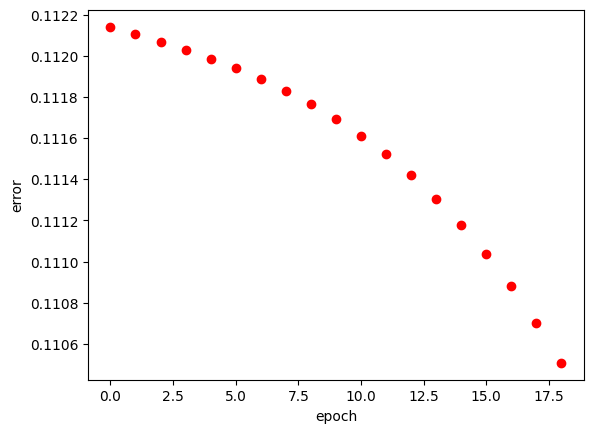

Plotting results


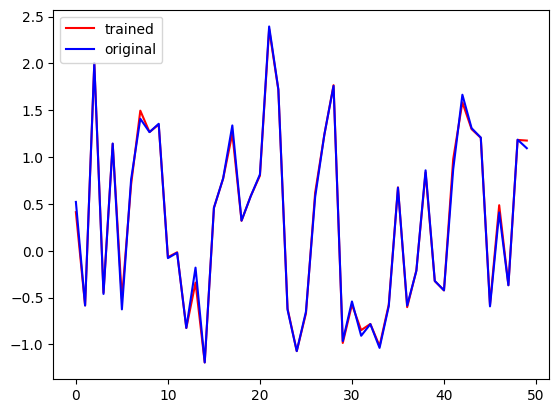

In [48]:
print("Plotting errors")
anf.plotErrors()
print("Plotting results")
anf.plotResults()

## Evaluation

Test data set would be row 80 until 100 of the data

In [49]:
# test dataset
x_test = df_tr.iloc[80:100,:4]
y_test = df_tr.iloc[80:100,4]

In [50]:
# predict using model
y_pred = anfis.predict(anf, np.array(x_test))

In [51]:
# MAE
print("MAE: ", mean_absolute_error(y_test, y_pred))

# RMSE
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

# R2
print("R2 Score: ", r2_score(y_test, y_pred))

MAE:  0.5178956062619023
RMSE:  0.6882005487190209
R2 Score:  0.44666531901902284


In [52]:
# reshape data
y_test = np.array(y_test).reshape(-1,1)
y_pred = y_pred.reshape(-1,1)

In [53]:
# inverse transform data (inverse standardization)
y_test = y_scaler.inverse_transform(y_test)
y_pred = y_scaler.inverse_transform(y_pred)

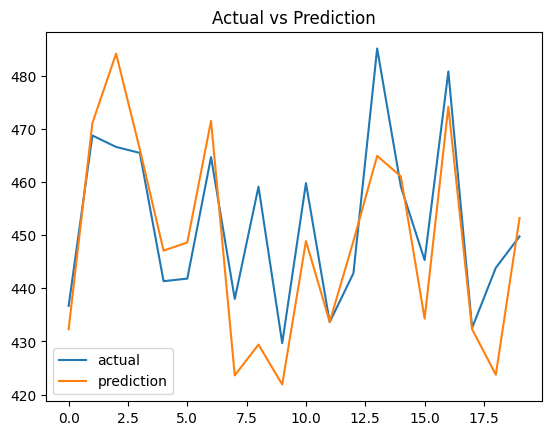

In [54]:
plt.title("Actual vs Prediction")
plt.plot(y_test, label="actual")
plt.plot(y_pred, label="prediction")
plt.legend()
plt.show()

In [55]:
y_test = pd.DataFrame(y_test, columns=["Actual"])
y_pred = pd.DataFrame(y_pred, columns=["Prediction"])
diff = pd.DataFrame(np.subtract(y_test.to_numpy(), y_pred.to_numpy()), columns=["Differences"])

df_predict = pd.concat([y_test, y_pred, diff], axis=1)
df_predict

,Actual,Prediction,Differences
0,436.69,432.301152,4.388848
1,468.75,471.082605,-2.332605
2,466.60,484.155317,-17.555317
3,465.48,466.143169,-0.663169
4,441.34,447.087061,-5.747061
5,441.83,448.639627,-6.809627
6,464.70,471.503590,-6.803590
7,437.99,423.609321,14.380679
8,459.12,429.409949,29.710051
9,429.69,421.903735,7.786265
